## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

   1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
   2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
   
Based on the results below, we can see that there are no missing values to clean.

   3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.

In [15]:
import pandas as pd

# PART 1:

# Load the data 
data = pd.read_csv("./data/car_data.csv")

# Display head
print(data.head())

# Display dimensions 
print("\nDimensions of the dataset:", data.shape)

# PART 2:

# Summarize 
summary = data.describe(include='all')
print("\nSummary of Variables: ")
print(summary)

# Check for missing values
missingValues = data.isnull().sum()
print("\nMissing Values:")
print(missingValues)

# See the number of males and females to compare later
print("\nGender values before dummy:")
print(data['Gender'].value_counts())

# create dummy variable that takes the value 0 for male and 1 for female
data['dummy'] = 0 
data.loc[ data['Gender']== 'Female', 'dummy'] = 1

# check that dummy variable was set correctly
print("\nGender values after dummy:")
print(data['dummy'].value_counts())

# Create the predictor matrix X and outcome variable y
X = data.loc[:,['Age','AnnualSalary']]
y = data['Purchased']
print("\nPredictor Matrix X:")
print(X.head())
print("\nOutcome Variable y:")
print(y.head())

# PART 3:

from sklearn.preprocessing import MinMaxScaler

# Initialize MaxMin/MinMax scalar
scaler = MinMaxScaler()

# Create a copy of X to avoid warnings
XNorm = X.copy()

# Fit and transform the scaler on X 
XNorm[['Age', 'AnnualSalary']] = scaler.fit_transform(XNorm[['Age', 'AnnualSalary']])

# Display normalized matrix X
print("Normalized Matrix X:")
print(XNorm.head())
print(XNorm.describe())

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0

Dimensions of the dataset: (1000, 5)

Summary of Variables: 
            User ID  Gender          Age   AnnualSalary    Purchased
count   1000.000000    1000  1000.000000    1000.000000  1000.000000
unique          NaN       2          NaN            NaN          NaN
top             NaN  Female          NaN            NaN          NaN
freq            NaN     516          NaN            NaN          NaN
mean     500.500000     NaN    40.106000   72689.000000     0.402000
std      288.819436     NaN    10.707073   34488.341867     0.490547
min        1.000000     NaN    18.000000   15000.000000     0.000000
25%      250.750000     NaN    32.000000   46375.000000     0.000000
50%      500.500000     NaN  

   4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
   5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
   
Based on my code with 5-fold cross-validation, The optimal number of neighbors is 4.

   6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
   
Based on my code below, The model predicts a sale when one fails approximately 6/200 or 3% of the time. The model predicts no sale when one does occur approximately 7/200 or 3.5% of the time. Overall, the code predicts outcomes correctly 93.5% of the time, which is pretty accurate but it could be better.
   
   7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)
   
Based on my code below, the code predicts outcomes correctly approximately 78/98 or 79.6% of the time for males and 90/104 or 86.5% of the time for females, so females tend to be predicted correctly more often than males. This discrepancy is importaint to note because based on the context, it can show bias or indicate sexism/gender differences.

Dimensions of Training Set (XTrain and yTrain): (800, 2) (800,)
Dimensions of Testing Set (XTest and yTest): (200, 2) (200,)

Optimal k-value: [5]
col_0        0   1
Purchased         
0          106   7
1            6  81

Male results:
col_0       0   1
Purchased        
0          52   3
1          15  26

Female results:
col_0       0   1
Purchased        
0          53   5
1           9  37


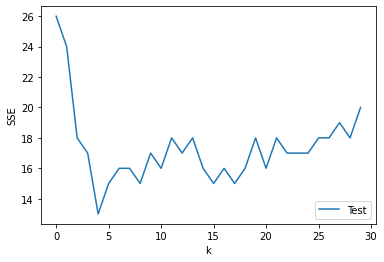

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create the predictor matrix X and outcome variable y
X = data.loc[:,['Age','AnnualSalary']]
y = data['Purchased']
# Initialize MaxMin/MinMax scalar
scaler = MinMaxScaler()
# Create a copy of X to avoid warnings
XNorm = X.copy()
# Fit and transform the scaler on X 
XNorm[['Age', 'AnnualSalary']] = scaler.fit_transform(XNorm[['Age', 'AnnualSalary']])

# PART 4:

# Split the dataset into training (80%) and testing (20%) sets
XTrain, XTest, yTrain, yTest = train_test_split(XNorm, y, test_size=0.2, random_state=14)

# Display dimensions of training and testing sets
print("Dimensions of Training Set (XTrain and yTrain):", XTrain.shape, yTrain.shape)
print("Dimensions of Testing Set (XTest and yTest):", XTest.shape, yTest.shape)

# PART 5:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# list of possible k-values
#kValues = list(range(1, 21))

# list to store mean cross-validation scores for each k-value
#mean_cv_scores = []

# k-fold cross-validation for each k-value
#for k in kValues:
#    knn = KNeighborsClassifier(n_neighbors=k)
#    cv_scores = cross_val_score(knn, XTrain, yTrain, cv=5)
#    mean_cv_scores.append(cv_scores.mean())

# Find the best k-value (with highest mean cross-validation score)
#bestkValue = kValues[mean_cv_scores.index(max(mean_cv_scores))]

# Print best k-value
#print("Optimal number of neighbors (k):", bestkValue)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 

# Determine the optimal k:
kBar = 30

# The range of k-values to consider
kGrid = np.arange(1,kBar) 

# Object to save the Sum of Squared Error
sse = np.zeros(kBar)
for k in range(kBar):
    # Create a sk model for k
    model = KNeighborsClassifier(n_neighbors=k+1) 
    
    # Train the model on our data
    fittedModel = model.fit(XTrain,yTrain) 
    
    # Predict values for test set
    yHat = fittedModel.predict(XTest)
    
    # Save the computed SSE
    sse[k] = np.sum( (yTest-yHat)**2 ) 
    
# Lowest recorded SSE
sseMin = np.min(sse)

# Find the indices of y that equal the minimum
minIndex = np.where(sse==sseMin)

# Find the optimal value of k
kStar = kGrid[minIndex] 
print("\nOptimal k-value:", kStar)

# Plot sse by k
plt.plot(np.arange(0,kBar),sse,label='Test') 
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

# PART 6:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# k-NN classifier with best k-value
#knnClassifier = KNeighborsClassifier(n_neighbors=4)

# Fit classifier on training data
#knnClassifier.fit(XTrain, yTrain)

# Predict outcomes of testing data
#yPrediction = knnClassifier.predict(XTest)

# Calculate and display confusion matrix
#confusion = confusion_matrix(yTest, yPrediction)
#print("Confusion Matrix:")
#print(confusion)

# Calculate how often model predicts a sale when one fails to occur (False Positive Rate)
#falsePositive = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])
#print("Rate of Predicting False Positive: ", falsePositive)

# Calculate how often model predicts no sale when one does occur (False Negative Rate)
#falseNegative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])
#print("Rate of Predicting False Negative: ", falseNegative)

# Calculate accuracy
#accuracy = accuracy_score(yTest, yPrediction)
#print("Accuracy:", accuracy)

# Create a sk model for k
model = KNeighborsClassifier(n_neighbors=5) 

# Train the model on our data
fittedModel = model.fit(XTrain,yTrain)

# Predict and print values for test set
yHat = fittedModel.predict(XTest) 
print(pd.crosstab(yTest, yHat))

# PART 7:

# Get male and female data from the Gender column
#maleData = data[data['Gender'] == 'Male']
#femaleData = data[data['Gender'] == 'Female']

# Extract 'Age' and 'AnnualSalary' features and 'Purchased' outcome for male and female data
#XMale = maleData[['Age', 'AnnualSalary']]
#yMale = maleData['Purchased']
#XFemale = femaleData[['Age', 'AnnualSalary']]
#yFemale = femaleData['Purchased']

# Predict outcomes for males and females 
#yPredMale = knnClassifier.predict(XMale)
#yPredFemale = knnClassifier.predict(XFemale)

# Calculate and display confusion matrices for males and females
#confusionMale = confusion_matrix(yMale, yPredMale)
#confusionFemale = confusion_matrix(yFemale, yPredFemale)
#print("\nConfusion Matrix for Males:")
#print(confusionMale)
#print("\nConfusion Matrix for Females:")
#print(confusionFemale)

# Calculate accuracy for males and females 
#accuracyMale = accuracy_score(yMale, yPredMale)
#accuracyFemale = accuracy_score(yFemale, yPredFemale)
#print("\nAccuracy for Males:", accuracyMale)
#print("Accuracy for Females:", accuracyFemale)

# Resplit the data including the gender variable:

from sklearn.model_selection import train_test_split

X = data.loc[:,['Age','AnnualSalary','Gender']]
y = data['Purchased']
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size=.2,random_state=14)

# Create a sk model for k using the optimal k-value
model = KNeighborsClassifier(n_neighbors=5) 

# Train the model
fittedModel = model.fit(XTrain.drop('Gender',axis=1),yTrain) 

# Predict values 
yHat = fittedModel.predict(XTest.drop('Gender',axis=1)) 

# Break out the true/predicted values by recorded sex:
yHatM = yHat[ XTest['Gender'] == 'Male']
yHatF = yHat[ XTest['Gender'] == 'Female']
yM = yTest[ XTest['Gender'] == 'Male']
yF = yTest[ XTest['Gender'] == 'Female']

print("\nMale results:")
print(pd.crosstab(yM, yHatM))
print("\nFemale results:")
print(pd.crosstab(yF, yHatF))

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

Based on my code below, there are no `NA`'s to handle in the `price`, `year`, and `mileage` columns.

2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

Based on the scatterplot for various k-values produced below, it appears that the actual price increases as the predicted price increases somewhat logarithmically. As the k-value increases, the data appears to become less scattered.

5. Determine the optimal $k$ for these data.

Based on my code below, the optimal k value for these data is 50.

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Based on my code and my previous observations, when the k value is lower the data is underfitting, meaning the data is too scattered. When the k value is larger the data is overfitting, meaning the data is tightly clustered and doesn't represent local patterns effectively. That is why the k value in the middle (k=50) was considered the most optimal, since it isn't overfitting or underfitting.

Missing Values:
price      0
year       0
mileage    0
dtype: int64

Head of the Data:
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

Dimensions of the Data:
(2499, 3)
Normalized Data:
   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537

Training set dimensions: (1999, 2) (1999,)
Evaluation set dimensions: (500, 2) (500,)
k=3: SSE = 74104066408.1111
k=10: SSE = 58718082893.020004
k=25: SSE = 56284483073.2304
k=50: SSE = 55101143607.1308
k=100: SSE = 56118859673.133606
k=300: SSE = 57250239275.424614


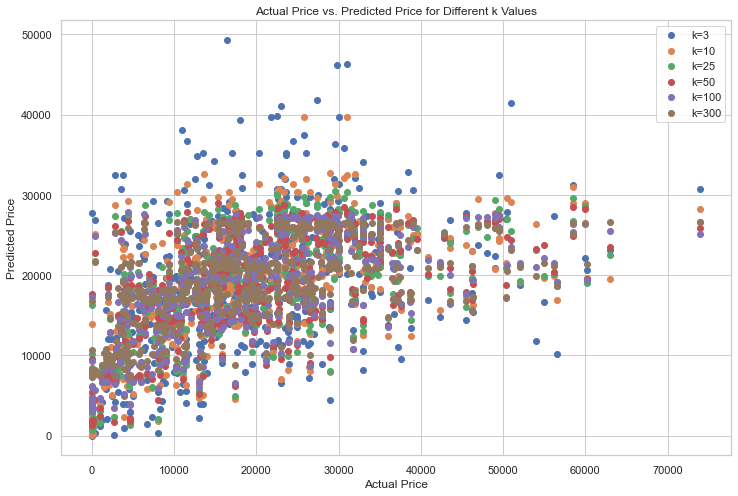

k=3: Mean MSE = 132446614.30458076
k=10: Mean MSE = 111597092.8710107
k=25: Mean MSE = 104993796.1653302
k=50: Mean MSE = 103883845.81865151
k=100: Mean MSE = 104498890.36000994
k=300: Mean MSE = 107333033.31461911
Optimal k: 50


In [52]:
import pandas as pd

# PART 1:

# Load the dataset
data = pd.read_csv('./data/USA_cars_datasets.csv')

# Select relevant variables
data = data[['price', 'year', 'mileage']]

# Check for missing values (NA's)
missingVals = data.isna().sum()
print("Missing Values:")
print(missingVals)

# Display data head 
data_head = data.head()
print("\nHead of the Data:")
print(data_head)

# Display dimensions
data_dimensions = data.shape
print("\nDimensions of the Data:")
print(data_dimensions)

# PART 2:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize the 'year' and 'mileage' columns
data[['year', 'mileage']] = scaler.fit_transform(data[['year', 'mileage']])

# Display the head of the normalized data
print("Normalized Data:")
print(data.head())

# PART 3:

from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = data[['year', 'mileage']]
y = data['price']

# Split the data into training and evaluation sets (80% training, 20% evaluation)
XTrain, XEval, yTrain, yEval = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the dimensions of the training and evaluation sets to confirm
print("\nTraining set dimensions:", XTrain.shape, yTrain.shape)
print("Evaluation set dimensions:", XEval.shape, yEval.shape)

# PART 4:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize lists to store Sum of Squared Error (sse) for each k
sseValues = []

# Initialize dictionary to store predicted values for each k
predictedValues = {}

# Loop through each k value
kValues = [3, 10, 25, 50, 100, 300]
for k in kValues:
    # Create kNN regressor with the current k value
    knnRegressor = KNeighborsRegressor(n_neighbors=k)
    
    # Fit model to training data
    knnRegressor.fit(XTrain, yTrain)
    
    # Predict prices for eval set
    yPred = knnRegressor.predict(XEval)
    
    # Calculate sse for current k
    sse = mean_squared_error(yEval, yPred) * len(yEval)
    sseValues.append(sse)
    
    # Store predicted values for plotting
    predictedValues[k] = yPred

# Display sse values for each k
for k, sse in zip(kValues, sseValues):
    print(f'k={k}: SSE = {sse}')

# Create a scatterplot for each k value
plt.figure(figsize=(12, 8))
for k in kValues:
    plt.scatter(yEval, predictedValues[k], label=f'k={k}')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

# PART 5:

from sklearn.model_selection import cross_val_score

# Initialize a dictionary to store mean of the mean squared error (MSE) values for each k
meanMseValues = {}

# Loop through each k value and perform cross-validation
for k in kValues:
    # Create a kNN regressor with the current k value
    knnRegressor = KNeighborsRegressor(n_neighbors=k)
    
    # Perform k-fold cross-validation (e.g., 5-fold)
    mseScores = -cross_val_score(knnRegressor, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate the mean MSE for the current k
    meanMse = np.mean(mseScores)
    meanMseValues[k] = meanMse

# Find optimal k with the lowest mean MSE
optimalK = min(meanMseValues, key=meanMseValues.get)

# Print mean MSE values for each k
for k, meanMse in meanMseValues.items():
    print(f'k={k}: Mean MSE = {meanMse}')

print(f'Optimal k: {optimalK}')


**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

Based on the code below, cluster 3 has the highest rental prices, followed by clusters 2 and then 5.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Based on the code below with the new clustering, cluster 2 has the highest rental prices.


Unique Bed Values:
[ 1.  3.  2.  4.  5. nan  6. 10.  7.  8. 12.  0. 16.  9. 11.]

Unique Number Of Reviews Values:
[ 1.  3.  2.  4.  5. nan  6. 10.  7.  8. 12.  0. 16.  9. 11.]

Unique Review Scores Rating Values:
[ nan  96. 100.  94.  90.  98.  93.  91.  97.  95.  99.  85.  86.  80.
  88.  92.  89.  82.  87.  81.  76.  78.  83.  66.  84.  72.  79.  60.
  40.  62.  74.  77.  50.  71.  75.  73.  69.  65.  68.  70.  67.  64.
  20.  57.  58.  43.  63.  55.  47.  53.  49.  30.]


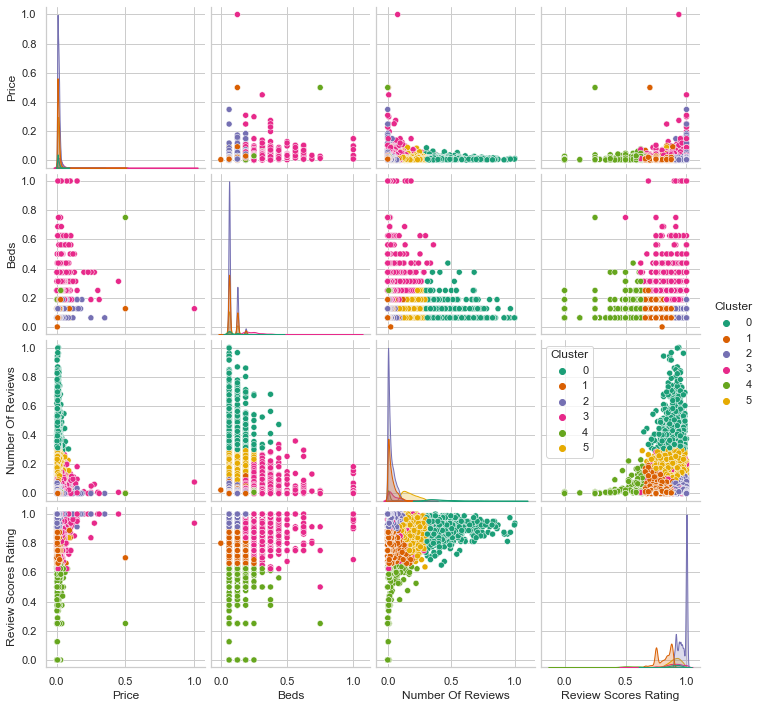


Average Prices for each Cluster:
Cluster
0    0.012342
1    0.012155
2    0.014092
3    0.029346
4    0.012358
5    0.013187
Name: Price, dtype: float64

Summary Statistics for Cluster Average Prices:
count    6.000000
mean     0.015580
std      0.006783
min      0.012155
25%      0.012346
50%      0.012773
75%      0.013866
max      0.029346
Name: Price, dtype: float64


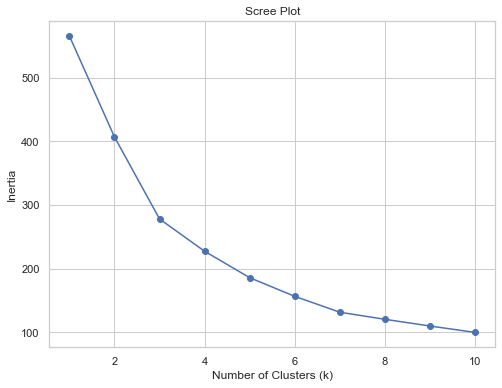

Optimal number of clusters: 3


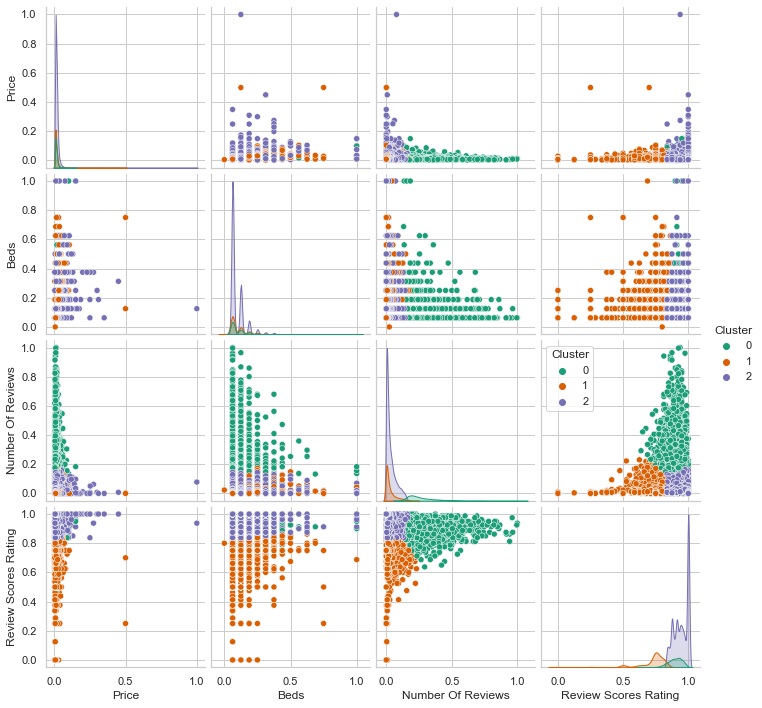


Average Prices for each Cluster:
Cluster
0    0.013296
1    0.013040
2    0.015022
Name: Price, dtype: float64

Summary Statistics for Cluster Average Prices:
count    3.000000
mean     0.013786
std      0.001078
min      0.013040
25%      0.013168
50%      0.013296
75%      0.014159
max      0.015022
Name: Price, dtype: float64


In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# PART 1:

# Load Airbnb data 
data = pd.read_csv('./data/airbnb_hw.csv')

# Clean the 'Price' column, removing non-numeric characters and converting to float
data['Price'] = data['Price'].str.replace(',', '').astype(float)
#print("\nUnique Price Values:")
#print(data['Price'].unique())

# Print unique values of 'Beds', 'Number Of Reviews', and 'Review Scores Rating' to see what needs to be cleaned
print("\nUnique Bed Values:")
print(data['Beds'].unique())

print("\nUnique Number Of Reviews Values:")
print(data['Beds'].unique())

print("\nUnique Review Scores Rating Values:")
print(data['Review Scores Rating'].unique())

# determined that other than nan values which will be dealt with in part 2, no values look incorrect

# PART 2:

# Remove rows with nan values 
data.dropna(inplace=True)

# Select columns for clustering and normalize them using Min-Max scaling
columns = ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']
scaler = MinMaxScaler()
data[columns] = scaler.fit_transform(data[selected_columns])

# PART 3:

from sklearn.cluster import KMeans

# Select columns for clustering
Columns = ['Beds', 'Number of Reviews', 'Review Scores Rating']

# Create DataFrame with only selected columns
clusterData = data[selected_columns]

# Initialize KMeans model with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)

# Fit model to data
kmeans.fit(clusterData)

# Add the cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# PART 4:

import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot using seaborn
sns.set(style='whitegrid')
sns.pairplot(data=data, hue='Cluster', palette='Dark2', vars=selected_columns)

# Add a legend
plt.legend(title='Cluster', loc='best')

# Show the pairplot
plt.show()

# PART 5:

# Group data by 'Cluster' and compute the average price for each cluster
clusterAveragePrices = data.groupby('Cluster')['Price'].mean()
print('\nAverage Prices for each Cluster:')
print(clusterAveragePrices)

# Display the summary statistics for each cluster's average price
clusterDescription = clusterAveragePrices.describe()
print("\nSummary Statistics for Cluster Average Prices:")
print(clusterDescription)

# PART 6:

import numpy as np

# Initialize list to store inertia (within-cluster sum of squares) values
inertiaValues = []

# Define range of k values to try
kValues = range(1, 11) 

# Calculate inertia for each k
for k in kValues:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(clusterData)
    inertiaValues.append(kmeans.inertia_)

# Create and show the scree plot
plt.figure(figsize=(8, 6))
plt.plot(kValues, inertiaValues, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.show()

# chose the optimal number of clusters to be 3 based on the scree plot
print(f"Optimal number of clusters: 3")

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(clusterData)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# repeat part 4: 

sns.set(style='whitegrid')
sns.pairplot(data=data, hue='Cluster', palette='Dark2', vars=selected_columns)
plt.legend(title='Cluster', loc='best')
plt.show()

# repeat part 5:

clusterAveragePrices = data.groupby('Cluster')['Price'].mean()
print('\nAverage Prices for each Cluster:')
print(clusterAveragePrices)

clusterDescription = clusterAveragePrices.describe()
print("\nSummary Statistics for Cluster Average Prices:")
print(clusterDescription)

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?